<a href="https://colab.research.google.com/github/suvankarmaitygithub/Deep-Learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
    # Input Layer ( 4 features of the flower)
    # Hidden Layer 1 ( some number of neurons)
    # Hidden Layer 2 ( some number of neurons)
    # Output ( 3 Classes of iris Flowers )
    def __init__(self, input_size=4, h1=8, h2=9, output_features=3):
        super().__init__() # instantiate our nn.Module class
        self.fc1 = nn.Linear(input_size, h1) #fc = fully connected layer
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
# Randomization
# Pick a manual seed
torch.manual_seed(41)

#Create an instance of model

model = Model()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df['species'] = df['species'].map({'setosa':0,'versicolor':1, 'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Train Test split

X = df.drop('species', axis=1)
y = df['species']

In [9]:
# Converting to numpy arrays

X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [11]:
# converting X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# Set the criterion of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()

# Choosing Optimizer , Learning Rate = (if error doesn;t go down after a bunch of iterations (epochs))

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
y_train = torch.tensor(y_train)

In [15]:
# train our model
# epochs = ? ( one run through all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(X_train)
    # calculate loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    print(f'Epoch: {i} Loss: {loss.item()}')
    # zero the gradients
    optimizer.zero_grad()
    # backpropogate
    loss.backward()
    # update weights
    optimizer.step()

Epoch: 0 Loss: 1.125285267829895
Epoch: 1 Loss: 1.111196756362915
Epoch: 2 Loss: 1.0990761518478394
Epoch: 3 Loss: 1.0881590843200684
Epoch: 4 Loss: 1.0782631635665894
Epoch: 5 Loss: 1.0690782070159912
Epoch: 6 Loss: 1.060321569442749
Epoch: 7 Loss: 1.051652431488037
Epoch: 8 Loss: 1.0424388647079468
Epoch: 9 Loss: 1.0315628051757812
Epoch: 10 Loss: 1.0188318490982056
Epoch: 11 Loss: 1.0073562860488892
Epoch: 12 Loss: 0.9945215582847595
Epoch: 13 Loss: 0.9785445332527161
Epoch: 14 Loss: 0.9630706906318665
Epoch: 15 Loss: 0.9461500644683838
Epoch: 16 Loss: 0.9264988303184509
Epoch: 17 Loss: 0.905254065990448
Epoch: 18 Loss: 0.8831369280815125
Epoch: 19 Loss: 0.8593514561653137
Epoch: 20 Loss: 0.8338496685028076
Epoch: 21 Loss: 0.8073970079421997
Epoch: 22 Loss: 0.7820923924446106
Epoch: 23 Loss: 0.7565685510635376
Epoch: 24 Loss: 0.731435239315033
Epoch: 25 Loss: 0.7084580063819885
Epoch: 26 Loss: 0.6874203085899353
Epoch: 27 Loss: 0.6662012338638306
Epoch: 28 Loss: 0.644412636756897
Ep

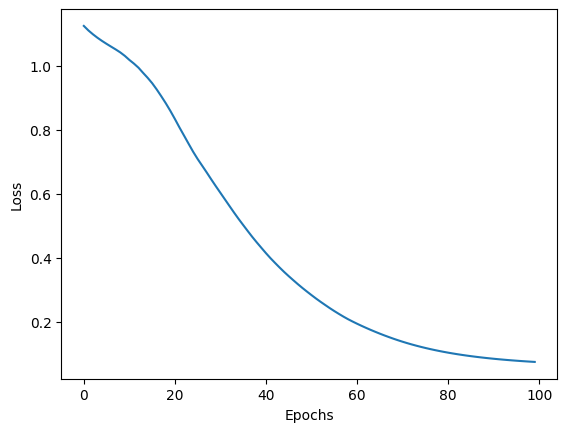

In [16]:
# Graph it out

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


In [17]:
# prompt: predict on test data on the above model

# make predictions
with torch.no_grad():
    y_pred = model(X_test)
    # convert to numpy arrays
    y_pred = y_pred.numpy()
    # argmax to get index of max value
    y_pred = np.argmax(y_pred, axis=1)

# compare with the actual values
print(y_pred)
print(y_test)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Epoch: 0 Loss: 0.06591948866844177
Epoch: 1 Loss: 0.06591948866844177
Epoch: 2 Loss: 0.06591948866844177
Epoch: 3 Loss: 0.06591948866844177
Epoch: 4 Loss: 0.06591948866844177
Epoch: 5 Loss: 0.06591948866844177
Epoch: 6 Loss: 0.06591948866844177
Epoch: 7 Loss: 0.06591948866844177
Epoch: 8 Loss: 0.06591948866844177
Epoch: 9 Loss: 0.06591948866844177
Epoch: 10 Loss: 0.06591948866844177
Epoch: 11 Loss: 0.06591948866844177
Epoch: 12 Loss: 0.06591948866844177
Epoch: 13 Loss: 0.06591948866844177
Epoch: 14 Loss: 0.06591948866844177
Epoch: 15 Loss: 0.06591948866844177
Epoch: 16 Loss: 0.06591948866844177
Epoch: 17 Loss: 0.06591948866844177
Epoch: 18 Loss: 0.06591948866844177
Epoch: 19 Loss: 0.06591948866844177
Epoch: 20 Loss: 0.06591948866844177
Epoch: 21 Loss: 0.06591948866844177
Epoch: 22 Loss: 0.06591948866844177
Epoch: 23 Loss: 0.06591948866844177
Epoch: 24 Loss: 0.06591948866844177
Epoch: 25 Loss: 0.06591948866844177
Epoch: 26 Loss: 0.06591948866844177
Epoch: 27 Loss: 0.06591948866844177
Ep

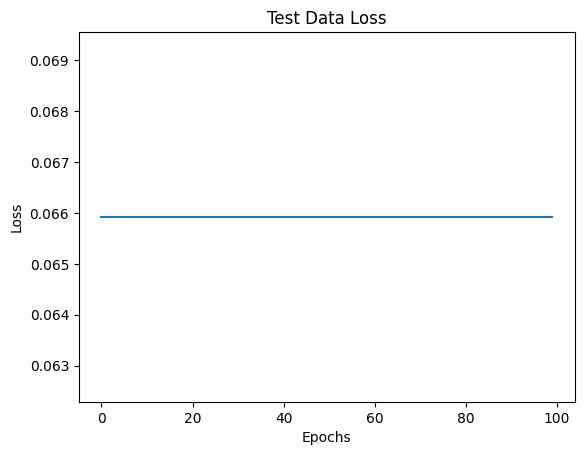

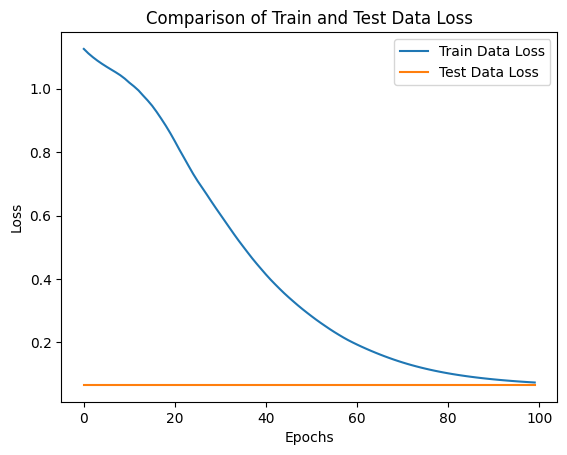

In [19]:
# prompt: plot the graph of the test data loss in compare to original

# Test data loss

y_test = torch.tensor(y_test)

test_losses = []

for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(X_test)
    # calculate loss
    loss = criterion(y_pred, y_test)
    test_losses.append(loss.detach().numpy())
    print(f'Epoch: {i} Loss: {loss.item()}')

# Graph it out

plt.plot(range(epochs), test_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Test Data Loss')
plt.show()

# Compare with original

plt.plot(range(epochs), losses, label='Train Data Loss')
plt.plot(range(epochs), test_losses, label='Test Data Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Comparison of Train and Test Data Loss')
plt.legend()
plt.show()


In [20]:
# Saving our NN Model

torch.save(model.state_dict(), 'my_iris_nn_model.pt')

In [21]:
# Loading the saved model

new_model = Model()
new_model.load_state_dict(torch.load('/content/my_iris_nn_model.pt'))

<All keys matched successfully>

In [22]:
# Make sure it loaded successfully

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

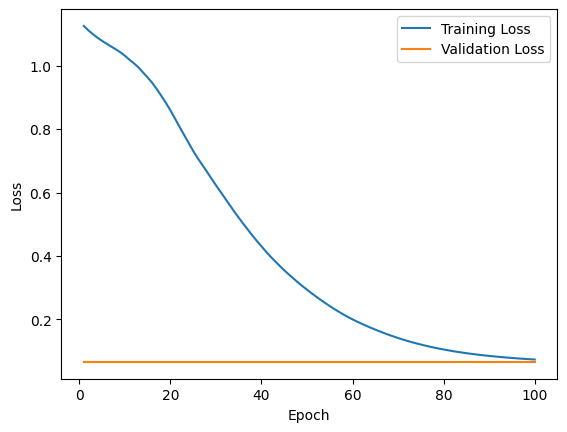

In [23]:
# prompt: Plot validation loss vs training loss graph

# create a list of epoch numbers
epochs = range(1, len(losses) + 1)

# plot the training loss
plt.plot(epochs, losses, label='Training Loss')

# plot the validation loss
plt.plot(epochs, test_losses, label='Validation Loss')

# add a legend and labels
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# show the plot
plt.show()
